In [1]:
import numpy as np
import pandas as pd
import math
import random

import matplotlib.pyplot as plt
% matplotlib inline

from __future__ import print_function
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

In [2]:
# Locations & Coordinates in North ZhaoXian

coordinate_list = [
 'depot', 114.748125, 37.750201,
 '宋城', 114.903234,37.85197,
 '赵刀寺', 114.72869,37.781231,
 '东阳台', 114.740252,37.823862,
 '常洋', 114.803039,37.776488,
 '小马圈', 114.804022,37.851744,
 '豆腐庄', 114.851979,37.843736,
 '前大章', 114.865526,37.865367,
 '梅花', 114.8317,37.891582, # 梅花
 '永安', 114.77435,37.83808,
 '乡官', 114.797613,37.867981,
 '曹古疃', 114.779879,37.808557,
 '鲁家庄', 114.767719,37.845097, # 栾城区 
 '安王村', 114.71166,37.798524,
 '北何庄', 114.8197,37.804607,
 '大马', 114.887135,37.868492,
 '投头庄', 114.840102,37.855959,
 '贾店村', 114.726521,37.801013,
 '石家庄', 114.890489,37.824124,
 '范村', 114.698397,37.79639,
 '北解疃', 114.795109,37.7917,
 '西罗村', 114.871172,37.853288,
 '仪停', 114.782591,37.832019,
 '后大章', 114.865834,37.867755,
 '彭家庄', 114.792664,37.804643,
 '林子', 114.910071,37.805321,
 '四德', 114.851108,37.87908,
 '东罗村', 114.882305,37.853451,
 '北轮城', 114.70097,37.788896,
 '肖庄', 114.770207,37.791428,
 '高庄', 114.902043,37.730501,
 '各南', 114.910162,37.817456,
 '泥沟', 114.833553,37.800309,
 '台兴庄', 114.751193,37.812218,
 '马谷庄', 114.762469,37.810494,
 '双庙', 114.78777,37.843918,
 '各子', 114.8928,37.837465, # 一村 二村 三村？
 '大吕村', 114.831951,37.823025,
 '齐家庄', 114.817472,37.846462,
 '北辛庄', 114.866827,37.81841,
 '王家庄', 114.806625,37.835115,
 '尚庄', 114.875416,37.889713, #藁城区
 '固德', 114.772933,37.858432,
 '徐家庄', 114.871728,37.836585,
 '新宅店', 114.726219,37.820187, #村居委会
 '黎村', 114.821105,37.790131,
 '史家庄', 114.798944,37.81971,
 '小吕村', 114.840012,37.816629
]

coordinate_array = np.array(coordinate_list).reshape(48,3)

In [3]:
coordinate_array

array([['depot', '114.748125', '37.750201'],
       ['宋城', '114.903234', '37.85197'],
       ['赵刀寺', '114.72869', '37.781231'],
       ['东阳台', '114.740252', '37.823862'],
       ['常洋', '114.803039', '37.776488'],
       ['小马圈', '114.804022', '37.851744'],
       ['豆腐庄', '114.851979', '37.843736'],
       ['前大章', '114.865526', '37.865367'],
       ['梅花', '114.8317', '37.891582'],
       ['永安', '114.77435', '37.83808'],
       ['乡官', '114.797613', '37.867981'],
       ['曹古疃', '114.779879', '37.808557'],
       ['鲁家庄', '114.767719', '37.845097'],
       ['安王村', '114.71166', '37.798524'],
       ['北何庄', '114.8197', '37.804607'],
       ['大马', '114.887135', '37.868492'],
       ['投头庄', '114.840102', '37.855959'],
       ['贾店村', '114.726521', '37.801013'],
       ['石家庄', '114.890489', '37.824124'],
       ['范村', '114.698397', '37.79639'],
       ['北解疃', '114.795109', '37.7917'],
       ['西罗村', '114.871172', '37.853288'],
       ['仪停', '114.782591', '37.832019'],
       ['后大章', '114.865834', 

In [76]:
# Randomly generate 8 locations + warehouse (0) for showcase

def rand_loc():
    rand_loc_list = [0]

    while ll < 8:
        rand_loc_list.append(random.randint(1,47))
        rand_loc_list = set(rand_loc_list)
        ll = len(rand_loc_list)

    return rand_loc_list

rand_loc_list

[0, 24, 38, 28, 19, 40, 28, 33, 45]

In [61]:
# extreme cases: rand_loc_list = [0, 1,3,13,17,25,30,31,44]

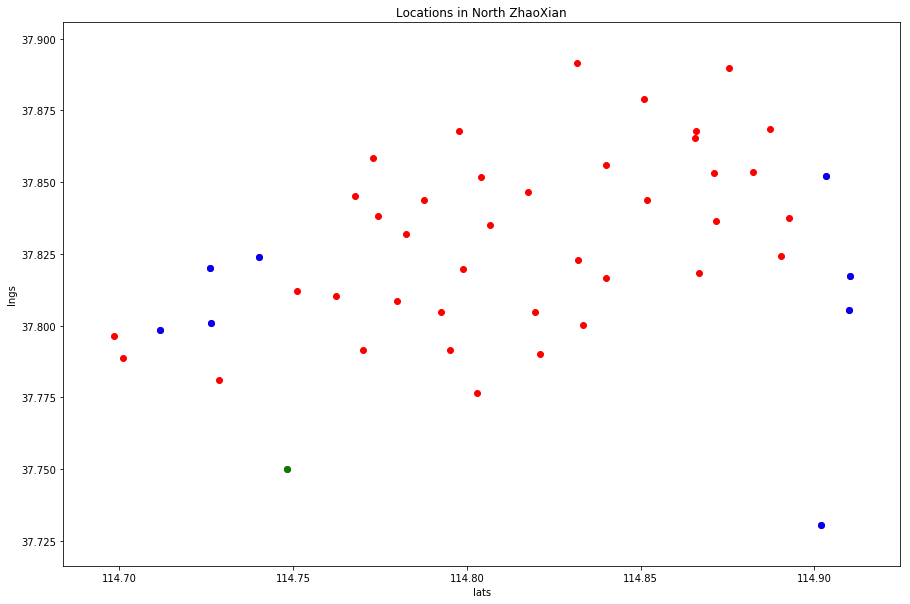

In [41]:
def exp_data_plot():
    
    base = [114.748125, 37.750201]
    fig = plt.figure(figsize = (15,10))  
    ax1 = fig.add_subplot(111) 
    
    lats = np.asarray(coordinate_array[:,1], dtype=float)
    lngs = np.asarray(coordinate_array[:,2], dtype=float)
    
    vis_lats = np.asarray(list(coordinate_array[lat,1] for lat in rand_loc_list[1:]), dtype=float)
    vis_lngs = np.asarray(list(coordinate_array[lng,2] for lng in rand_loc_list[1:]), dtype=float)

    ax1.set_title('Locations in North ZhaoXian')  
    plt.xlabel('lats')  
    plt.ylabel('lngs')  

    ax1.scatter(lats, lngs, c = 'r',marker = 'o') 
    ax1.scatter(vis_lats, vis_lngs, c = 'b',marker = 'o') 
    ax1.scatter(base[0], base[1], c = 'g',marker = 'o')
    
    plt.show() 

exp_data_plot()

In [42]:
# Formulate the data

def data_example():
    test_data = {}
    test_data['name_locations'] = [str(coordinate_array[nl][0]) for nl in rand_loc_list]
    test_data['coordinates'] = [(float(coordinate_array[coor][1]), float(coordinate_array[coor][2])) for coor in rand_loc_list]
    test_data['num_locations'] = len(test_data['coordinates'])
    test_data["num_vehicles"] = 2
    test_data["depot"] = 0
    return test_data

In [43]:
def manhattan_distance(position_1, position_2):
    # Computes the Manhattan distance between two points in km 
    
    return (abs(position_1[0] - position_2[0]) * 111 + abs(position_1[1] - position_2[1]) * 85)

In [44]:
def create_distance_callback(test_data):
    # Creates callback to return distance between points
    
    _distances = {}

    for from_node in range(test_data["num_locations"]):
        _distances[from_node] = {}
        for to_node in range(test_data["num_locations"]):
            if from_node == to_node:
                _distances[from_node][to_node] = 0
            else:
                _distances[from_node][to_node] = (manhattan_distance(
                    test_data["coordinates"][from_node],
                    test_data["coordinates"][to_node]))

    def distance_callback(from_node, to_node):
        return _distances[from_node][to_node]

    return distance_callback

In [58]:
def add_distance_dimension(routing, distance_callback):
    """Add Global Span constraint"""
    distance = 'Distance'
    maximum_distance = 60  # Maximum distance per vehicle.
    routing.AddDimension(
        distance_callback,
        0,  # null slack
        maximum_distance,
        True,  # start cumul to zero
        distance)
    distance_dimension = routing.GetDimensionOrDie(distance)
    # Try to minimize the max distance among vehicles.
    distance_dimension.SetGlobalSpanCostCoefficient(100)

In [53]:
def print_solution(data, routing, assignment):

    total_distance = 0
    for vehicle_id in range(data["num_vehicles"]):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for shift {}:\n'.format(vehicle_id)
        distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} ->'.format(data['name_locations'][routing.IndexToNode(index)])
            previous_index = index
            index = assignment.Value(routing.NextVar(index))
            distance += routing.GetArcCostForVehicle(previous_index, index, vehicle_id)
        plan_output += ' {}\n'.format(data['name_locations'][routing.IndexToNode(index)])
        plan_output += 'Distance of route: {}km\n'.format(distance)
        print(plan_output)
        total_distance += distance
    print('Total distance of all routes: {}km'.format(total_distance))

In [59]:
def main():

    data = data_example()
    
    # Create Routing Model
    routing = pywrapcp.RoutingModel(
        data["num_locations"],
        data["num_vehicles"],
        data["depot"])
    
    # Define weight of each edge
    distance_callback = create_distance_callback(data)
    routing.SetArcCostEvaluatorOfAllVehicles(distance_callback)
    add_distance_dimension(routing, distance_callback)
    
    # Setting first solution heuristic (cheapest addition).
    search_parameters = pywrapcp.RoutingModel.DefaultSearchParameters()
    search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    
    # Solve the problem.
    assignment = routing.SolveWithParameters(search_parameters)
    if assignment:
        print_solution(data, routing, assignment)

In [60]:
main()

Route for shift 0:
 depot -> 高庄 -> 宋城 -> depot
Distance of route: 53km

Route for shift 1:
 depot -> 贾店村 -> 安王村 -> 新宅店 -> 东阳台 -> 各南 -> 林子 -> depot
Distance of route: 53km

Total distance of all routes: 106km
